In [ ]:
import pandas as pd

train = pd.read_parquet('/kaggle/input/avito-reranker/train-dset.parquet')


## –ö—Ä–∞—Å—Ç–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ —Ä–µ—à–µ–Ω–∏—è

–î–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏—Å–ø–æ–ª—å–∑–≤—É–µ—Ç—Å—è –º–æ–¥–µ–ª—å CatBoostRanker, —Ä–µ–∞–ª–∏–∑—É—é—â–∞—è –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É , –∫–æ—Ç–æ—Ä–∞—è –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏, –≤ —Ç–æ–º —á–∏—Å–ª–µ NDCG@10.

## –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–∏–ø–æ–≤

In [5]:
train.head(10)

query_id     item_id               query_text  \
0         4  7349717282  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
1         4  7519735286  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
2         4  4384449104  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
3         4  7283365509  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
4         4  4452768560  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
5         4  7607943724  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
6         4  7538499003  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
7         4  4699894907  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
8         4  7355922557  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
9         4  4043345112  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   

                                         item_title  \
0                              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ Zara   
1                      –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara —É–Ω–∏—Å–µ–∫—Å   
2                              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara   
3                  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ Zara 21 —Ä–∞–∑–º–µ—Ä   
4                  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ zara —Ä–∞–∑–º–µ—Ä 21   
5                     –ë–æ—Ç–∏–Ω–∫–∏ —á–µ–ª—Å–∏ zara –¥–µ—Ç—Å–∫–∏–µ 21   
6                         –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ 21 —Ä–∞–∑–º–µ—Ä   
7                           –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara 21   
8          –ë–æ—Ç–∏–Ω–æ—á–∫–∏ –¥–µ—Ç—Å–∫–∏–µ Zara 21 —Ä. –ù–∞—Ç—É—Ä–∞–ª—å–Ω—ã–µ   
9  –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ –∏ —Ä–µ–∑–∏–Ω–æ–≤—ã–µ —Å–∞–ø–æ–∂–∫–∏ 21 22 —Ä–∞–∑–º–µ—Ä   

                                    item_description  query_cat  query_mcat  \
0  –ù–æ–≤—ã–µ –ø–æ–ª—É–±–æ—Ç–∏–Ω–∫–∏ —Ñ–∏—Ä–º—ã Zara. \n—Ä–∞–∑–º–µ—Ä—ã 21 —Å—Ç–µ...       29.0        38.0   
1               –ö—Ä—É—Ç—ã–µ –±–æ—Ç–∏–Ω–∫–∏, –≤ –æ—Ç–ª–∏—á–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏       29.0        38.0   
2  –ß–µ–ª—Å–∏ –¥–∏–º–µ—Å–µ–∑–æ–Ω–Ω—ã–µ Zara \n–í –∏–¥–µ–∞–ª—å–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏...       29.0        38.0   
3                         –ê–í–ò–¢–û –î–û–°–¢–ê–í–ö–ê .21 –†–ê–ó–ú–ï–†.       29.0        38.0   
4  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara \n–†–∞–∑–º–µ—Ä 21 - 13 —Å–º\n–°–æ—Å—Ç...       29.0        38.0   
5  –ë–æ—Ç–∏–Ω–æ—á–∫–∏ Zara –∏–∑ –∑–∞–º—à–∏, –Ω–æ—Å–∏–ª–∏ –º–∞–ª–æ. –ù–µ–º–Ω–æ–≥–æ ...       29.0        38.0   
6  –ë–æ—Ç–∏–Ω–æ—á–∫–∏ Zara –≤–µ—Å–Ω–∞-–æ—Å–µ–Ω—å –Ω–∞ –º–∞–ª—å—á–∏–∫–∞ –≤ —Ö–æ—Ä–æ—à...       29.0        38.0   
7  –ü—Ä–æ–¥–∞—é –∑–∞–º—à–µ–≤—ã–µ –ø–æ–ª—É–±–æ—Ç–∏–Ω–∫–∏ Zara –≤ —Ö–æ—Ä–æ—à–µ–º —Å–æ—Å...       29.0        38.0   
8  –ë–æ—Ç–∏–Ω–æ—á–∫–∏ Zara –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã–µ 21 —Ä. –°–ª–µ–¥—ã –Ω–æ—Å–∫–∏ –µ...       29.0        38.0   
9  1. –ë–æ—Ç–∏–Ω–æ—á–∫–∏ –¥–µ–º–∏—Å–µ–∑–æ–Ω–Ω—ã–µ –æ—Ç +17 –¥–æ +10. –ë–µ–∑ —É...       29.0        38.0   

   query_loc  item_cat_id  item_mcat_id  item_loc   price  \
0   624480.0           29       2179540    638660   500.0   
1   624480.0           29       2179540    637640   250.0   
2   624480.0           29       2179540    623880  1500.0   
3   624480.0           29       2179540    628530   220.0   
4   624480.0           29       2179540    637640  1648.0   
5   624480.0           29       2179540    637640   450.0   
6   624480.0           29       2179585    640860   700.0   
7   624480.0           29       2179585    644200   550.0   
8   624480.0           29       2179585    631870   100.0   
9   624480.0           29       2179585    638520   750.0   

   item_query_click_conv  item_contact  
0                   -1.0           0.0  
1                   -1.0           0.0  
2                   -1.0           0.0  
3                   -1.0           0.0  
4                   -1.0           1.0  
5                   -1.0           0.0  
6                   -1.0           0.0  
7                   -1.0           0.0  
8                   -1.0           0.0  
9                   -1.0           0.0

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781790 entries, 0 to 7781789
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   query_id               int64  
 1   item_id                int64  
 2   query_text             object 
 3   item_title             object 
 4   item_description       object 
 5   query_cat              float32
 6   query_mcat             float64
 7   query_loc              float32
 8   item_cat_id            int32  
 9   item_mcat_id           int32  
 10  item_loc               int32  
 11  price                  float32
 12  item_query_click_conv  float32
 13  item_contact           float32
dtypes: float32(5), float64(1), int32(3), int64(2), object(3)
memory usage: 593.7+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335348 entries, 0 to 335347
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   query_id               335348 non-null  int64  
 1   item_id                335348 non-null  int64  
 2   query_text             335348 non-null  object 
 3   item_title             335346 non-null  object 
 4   item_description       335346 non-null  object 
 5   query_cat              335348 non-null  float32
 6   query_mcat             259323 non-null  float64
 7   query_loc              335348 non-null  float32
 8   item_cat_id            335348 non-null  int32  
 9   item_mcat_id           335348 non-null  int32  
 10  item_loc               335348 non-null  int32  
 11  price                  335348 non-null  float32
 12  item_query_click_conv  335348 non-null  float32
dtypes: float32(4), float64(1), int32(3), int64(2), object(3)
memory usage: 24.3+ MB


–ò –Ω–∞ train –∏ –Ω–∞ test –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å–≤–∏—è –≤ —Ç–∏–ø–∞—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö –º–µ–∂–¥—É –∑–∞–ø—Ä–æ—Å–∞–º–∏ –∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è–º–∏

In [5]:
print(train.isnull().sum())
print(test.isnull().sum())

query_id                       0
item_id                        0
query_text                     0
item_title                   107
item_description             107
query_cat                      0
query_mcat               1761233
query_loc                      0
item_cat_id                    0
item_mcat_id                   0
item_loc                       0
price                          0
item_query_click_conv          0
item_contact                   0
dtype: int64
query_id                     0
item_id                      0
query_text                   0
item_title                   2
item_description             2
query_cat                    0
query_mcat               76025
query_loc                    0
item_cat_id                  0
item_mcat_id                 0
item_loc                     0
price                        0
item_query_click_conv        0
dtype: int64


–ù–∞–±–ª—é–¥–∞—é—Ç—Å—è –ø—Ä–æ–ø—É—Å–∫–∏ –≤ item_title, item_description –∏ query_mcat

In [9]:
import re

def count_words(text):
    if not isinstance(text, str):
        return 0
    return len(re.findall(r"\w+", text))

def prepare_dataset(df, is_train=True):
    df['item_title'] = df['item_title'].fillna("")
    df['item_description'] = df['item_description'].fillna("")
    df['query_mcat'] = df['query_mcat'].fillna(0.0)
    df["item_query_click_conv"].fillna(0.0)
    
    if 'item_contact' in df.colums:
        df['item_contact'] = df['item_contact'].astype("int8")

    df["query_loc"] = df["query_loc"].astype("int32")
    df["query_cat"] = df["query_cat"].astype("int32")
    df["query_mcat"] = df["query_mcat"].astype("int32")

    df["query_text"] = df["query_text"].astype(str)
    df["item_title"] = df["item_title"].astype(str)
    df["item_description"] = df["item_description"].astype(str)

In [ ]:
prepare_dataset(train)

In [9]:
train.head()

query_id     item_id               query_text  \
0         4  7349717282  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
1         4  7519735286  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
2         4  4384449104  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
3         4  7283365509  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
4         4  4452768560  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   

                         item_title  \
0              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ Zara   
1      –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara —É–Ω–∏—Å–µ–∫—Å   
2              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara   
3  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ Zara 21 —Ä–∞–∑–º–µ—Ä   
4  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ zara —Ä–∞–∑–º–µ—Ä 21   

                                    item_description  query_cat  query_mcat  \
0  –ù–æ–≤—ã–µ –ø–æ–ª—É–±–æ—Ç–∏–Ω–∫–∏ —Ñ–∏—Ä–º—ã Zara. \n—Ä–∞–∑–º–µ—Ä—ã 21 —Å—Ç–µ...         29          38   
1               –ö—Ä—É—Ç—ã–µ –±–æ—Ç–∏–Ω–∫–∏, –≤ –æ—Ç–ª–∏—á–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏         29          38   
2  –ß–µ–ª—Å–∏ –¥–∏–º–µ—Å–µ–∑–æ–Ω–Ω—ã–µ Zara \n–í –∏–¥–µ–∞–ª—å–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏...         29          38   
3                         –ê–í–ò–¢–û –î–û–°–¢–ê–í–ö–ê .21 –†–ê–ó–ú–ï–†.         29          38   
4  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara \n–†–∞–∑–º–µ—Ä 21 - 13 —Å–º\n–°–æ—Å—Ç...         29          38   

   query_loc  item_cat_id  item_mcat_id  ...  item_query_click_conv  \
0     624480           29       2179540  ...                   -1.0   
1     624480           29       2179540  ...                   -1.0   
2     624480           29       2179540  ...                   -1.0   
3     624480           29       2179540  ...                   -1.0   
4     624480           29       2179540  ...                   -1.0   

   item_contact  conv_missing  loc_match  item_cat_freq_in_query  \
0             0             1          0                     1.0   
1             0             1          0                     1.0   
2             0             1          0                     1.0   
3             0             1          0                     1.0   
4             1             1          0                     1.0   

   item_mcat_freq_in_query  title_len  desc_len  price_log  price_bin  
0                      0.6          3        25   6.216606          1  
1                      0.6          4         5   5.525453          0  
2                      0.6          3         9   7.313887          1  
3                      0.6          5         4   5.398163          0  
4                      0.6          5        20   7.407924          2  

[5 rows x 22 columns]

### –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [ ]:
train['item_contact'].value_counts()

–¢–∞—Ä–≥–µ—Ç –æ—á–µ–Ω—å —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—ã–π. –≠—Ç–æ –º–æ–∂–µ—Ç —Å–∫–∞–∑–∞—Ç—å—Å—è –Ω–∞ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø—Ä–æ—Å–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –∏–º–µ—é—Ç —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ–≥–æ –∫–∞–Ω–¥–∏–¥–∞—Ç–∞ —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º —Ç–∞—Ä–≥–µ—Ç–æ–º.

In [ ]:
group_positive_counts = train.groupby('query_id')['item_contact'].sum()

groups_without_positives = group_positive_counts[group_positive_counts == 0]

num_groups_without_1 = len(groups_without_positives)

print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≥—Ä—É–ø–ø –±–µ–∑ –µ–¥–∏–Ω–∏—Ü:", num_groups_without_1)
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≥—Ä—É–ø–ø", train['query_id'].nunique())

–¢–∞–∫–∏—Ö –≥—Ä—É–ø–ø —Ç–∞–∫–∂–µ –æ—á–µ–Ω—å –º–∞–ª–æ. 

In [13]:
import matplotlib.pyplot as plt

plt.hist(train["price"], bins=100, alpha=0.5, label="original")
plt.legend()
plt.show()

count    7.781790e+06
mean     1.563658e+06
std      9.410203e+08
min      0.000000e+00
25%      6.000000e+02
50%      2.600000e+03
75%      1.310000e+04
max      1.000000e+12
Name: price, dtype: float64

–ú–Ω–æ–≥–æ –º–∞–ª–µ–Ω—å–∫–∏—Ö —Ü–µ–Ω.

In [14]:
import matplotlib.pyplot as plt

plt.hist(train["item_query_click_conv"], bins=100, alpha=0.5, label="original")
plt.legend()
plt.show()

count    7.781790e+06
mean    -8.375558e-01
std      3.665795e-01
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%     -1.000000e+00
max      1.000000e+00
Name: item_query_click_conv, dtype: float64

item_click_conv –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Å–æ–¥–µ—Ä–∂–∏—Ç –∑–Ω–∞—á–µ–Ω–∏—è -1.0, –æ—Å—Ç–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –æ—Ç 0 –¥–æ 1. –≠—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è -1.0 - –ø—Ä–æ–ø—É—Å–∫–∏.

In [6]:
print(train.groupby("loc_match")["item_contact"].mean())
print(train["loc_match"].value_counts(normalize=True))

loc_match
0    0.035623
1    0.053004
Name: item_contact, dtype: float32
loc_match
0    0.514723
1    0.485277
Name: proportion, dtype: float64


–î–æ–ª—è —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π –≤ –ª–æ–∫–∞—Ü–∏—è—Ö –≤—ã—Å–æ–∫–∞, –∑–Ω–∞—á–∏—Ç –ø—Ä–∏–∑–Ω–∞–∫ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π.

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

CatBoostRanker —Å–∞–º —Ä–∞–±–æ—Ç–∞–µ—Ç —Å —Ç–µ–∫—Ç—Å–æ–≤—ã–º–∏ —Ñ–∏—á–∞–º–∏, –ø—Ä–µ–æ–±—Ä–∞–∑—É—è –∏—Ö –≤ —á–∏—Å–ª–æ–≤—ã–µ - BoW, BM25, NaiveBayes. –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —ç—Ç–∏–º. –û–¥–Ω–∞–∫–æ, –¥–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–µ —É—á–∏—Ç—ã–≤–∞—é—Ç –¥–ª–∏–Ω—É –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π –∑–∞–≥–æ–ª–æ–≤–æ–∫–æ–≤ –∏ –æ–ø–∏—Å–∞–Ω–∏–π. –ò–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ, —Ç–∞–∫ –∫–∞–∫ –ø–æ –±–æ–ª–µ–µ —Ä–∞–∑–≤–µ—Ä–Ω—É—Ç—ã–º –æ–ø–∏—Å–∞–Ω–∏—è–º –æ—Ç–∫–ª–∏–∫ –º–æ–∂–µ—Ç –±—ã—Ç—å –±–æ–ª—å—à–µ. –î–æ–±–∞–≤–∏–º —Ñ–∏—á–∏ title_len –∏ desc_len.

–ö–∞–∫ —É–∂–µ –±—ã–ª–æ –æ—Ç–º–µ—á–µ–Ω–æ, item_query_click_conv –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –¥–æ–±–∞–≤–∏–º –ø—Ä–∏–∑–Ω–∞–∫ conv_missing.

–¢–∞–∫–∂–µ –¥–æ–±–∞–≤–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è –ª–æ–∫–∞—Ü–∏–∏ (loc_match) —á–∞—Å—Ç–æ—Ç—ã cat –∏ mcat —Å—Ä–µ–¥–∏ –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤ –∑–∞–ø—Ä–æ—Å–∞ (item_cat_freq_in_query –∏ item_mcat_freq_in_query)

–¢–∞–∫–∂–µ —á—Ç–æ–±—ã –Ω–µ–º–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ü–µ–Ω—ã –≤–æ–∑—å–º–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ price_log –∏ price_bin.



In [ ]:
def build_features(df):
    df["conv_missing"] = (df["item_query_click_conv"] == -1.0).astype("int8")
    df["loc_match"] = (df["query_loc"] == df["item_loc"]).astype("int8")

    item_cat_count_in_query = df.groupby(['query_id', 'item_cat_id'])['item_id'].transform('count')
    query_total_items = df.groupby('query_id')['item_id'].transform('count')
    df['item_cat_freq_in_query'] = (item_cat_count_in_query / query_total_items).astype("float32")
    
    item_mcat_count_in_query = df.groupby(['query_id', 'item_mcat_id'])['item_id'].transform('count')
    df['item_mcat_freq_in_query'] = (item_mcat_count_in_query / query_total_items).astype("float32")

    df["title_len"] = df["item_title"].apply(count_words).astype("int16")
    
    df["desc_len"] = df["item_description"].apply(count_words).astype("int16")
    
    df['price_log'] = np.log1p(df["price"])
    
    df["price_bin"] = pd.qcut(df["price"], q=5, labels=False, duplicates="drop").astype("int8")


In [ ]:
build_features(train)

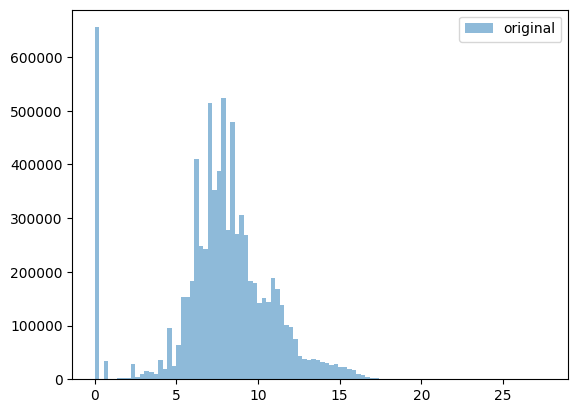

In [11]:
import matplotlib.pyplot as plt

plt.hist(train["price_log"], bins=100, alpha=0.5, label="original")
plt.legend()
plt.show()

In [14]:
train.head()

query_id     item_id               query_text  \
0         4  7349717282  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
1         4  7519735286  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
2         4  4384449104  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
3         4  7283365509  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
4         4  4452768560  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   

                         item_title                  item_description  \
0              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ Zara              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ Zara   
1      –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara —É–Ω–∏—Å–µ–∫—Å      –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara —É–Ω–∏—Å–µ–∫—Å   
2              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara   
3  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ Zara 21 —Ä–∞–∑–º–µ—Ä  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ Zara 21 —Ä–∞–∑–º–µ—Ä   
4  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ zara —Ä–∞–∑–º–µ—Ä 21  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ zara —Ä–∞–∑–º–µ—Ä 21   

   query_cat  query_mcat  query_loc  item_cat_id  item_mcat_id  item_loc  \
0     624480      624480     624480           29       2179540    638660   
1     624480      624480     624480           29       2179540    637640   
2     624480      624480     624480           29       2179540    623880   
3     624480      624480     624480           29       2179540    628530   
4     624480      624480     624480           29       2179540    637640   

    price  item_query_click_conv  item_contact  conv_missing  loc_match  \
0   500.0                   -1.0           0.0             1          0   
1   250.0                   -1.0           0.0             1          0   
2  1500.0                   -1.0           0.0             1          0   
3   220.0                   -1.0           0.0             1          0   
4  1648.0                   -1.0           1.0             1          0   

   price_log  price_bin  
0   6.216606          1  
1   5.525453          0  
2   7.313887          1  
3   5.398163          0  
4   7.407924          2

–î–∞—Ç–∞—Å–µ—Ç –±–æ–ª—å—à–æ–π, —Å–æ—Ö—Ä–∞–Ω–∏–º –µ–≥–æ, —á—Ç–æ–±—ã —Å—ç–∫–æ–Ω–æ–º–∏—Ç—å —Ä–µ—Å—É—Ä—Å—ã –Ω–∞ kaggle :)

In [11]:
def make_cd_file(df, target_col, group_col, text_features, cat_features, ignore_features, filename="train.cd"):

    with open(filename, "w", encoding="utf-8") as f:
        for idx, col in enumerate(df.columns):
            if col == target_col:
                f.write(f"{idx}\tTarget\n")
            elif col == group_col:
                f.write(f"{idx}\tGroupId\n")
            elif col in ignore_features:
                f.write(f"{idx}\tAuxiliary\n")
            elif col in text_features:
                f.write(f"{idx}\tText\n")
            elif col in cat_features:
                f.write(f"{idx}\tCateg\n")
            else:
                f.write(f"{idx}\tNum\n")  # –≤—Å—ë –æ—Å—Ç–∞–ª—å–Ω–æ–µ —Å—á–∏—Ç–∞–µ–º —á–∏—Å–ª–æ–≤—ã–º–∏
    print(f"CD-—Ñ–∞–π–ª —Å–æ—Ö—Ä–∞–Ω—ë–Ω –∫–∞–∫ {filename}")

In [18]:
from sklearn.model_selection import train_test_split

df = train
cat_features = ['query_cat', 'query_mcat', 'query_loc',
                'item_cat_id', 'item_mcat_id', 'item_loc']
ignore_features = ['item_contact','query_id','item_id']
text_features = ['query_text', 'item_title', 'item_description']
features = [c for c in df.columns if c not in ignore_features]
target_col = 'item_contact'

unique_queries = df['query_id'].unique()
train_queries, val_queries = train_test_split(
    unique_queries, test_size=0.2, random_state=42
)

is_val = df['query_id'].isin(val_queries).to_numpy()

df = df.sort_values('query_id')

make_cd_file(df.loc[~is_val, features], target_col, 'query_id', text_features, cat_features, ignore_features)
make_cd_file(df.loc[is_val, features], target_col, 'query_id', text_features, cat_features, ignore_features, 'val.cd')

CD-—Ñ–∞–π–ª —Å–æ—Ö—Ä–∞–Ω—ë–Ω –∫–∞–∫ train.cd
CD-—Ñ–∞–π–ª —Å–æ—Ö—Ä–∞–Ω—ë–Ω –∫–∞–∫ val.cd


In [19]:
df.loc[~is_val, features].to_csv("train.csv", index=False)
df.loc[is_val, features].to_csv("val.csv", index=False)

In [ ]:
train.to_parquet(f"train_full.parquet", index=False, compression="snappy")

## –û–±—É—á–µ–Ω–∏–µ

In [ ]:
import pandas as pd 
train = pd.read_parquet(f"/kaggle/input/avito-train-full/train_full.parquet")

In [9]:
# from sklearn.model_selection import GroupKFold
# from catboost import CatBoostRanker, Pool
# from sklearn.model_selection import train_test_split

# df = train

# cat_features = ['query_cat', 'query_mcat', 'query_loc',
#                 'item_cat_id', 'item_mcat_id', 'item_loc']
# ignore_features = ['item_contact','query_id','item_id']
# text_features = ['query_text', 'item_title', 'item_description']
# features = [col for col in df.columns if col not in ignore_features]
# target_col = 'item_contact'

# # —É–º–µ–Ω—å—à–µ–Ω–∏–µ –ø–∞–º—è—Ç–∏
# for col in df.select_dtypes(include=["int64"]).columns:
#     df[col] = df[col].astype("int32")
# for col in df.select_dtypes(include=["float64"]).columns:
#     df[col] = df[col].astype("float32")
# for col in cat_features:
#     if col in df.columns:
#         df[col] = df[col].astype("category")

# # –¥–µ–ª–∏–º –∑–∞–ø—Ä–æ—Å—ã
# unique_queries = df['query_id'].unique()
# train_queries, val_queries = train_test_split(unique_queries, test_size=0.2, random_state=42)

# # –º–∞—Å–∫–∞ –≤–º–µ—Å—Ç–æ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤ df
# is_val = df["query_id"].isin(val_queries)

# # —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ inplace
# df.sort_values("query_id", inplace=True)

# train_pool = Pool(
#     data=df.loc[~is_val, features],
#     label=df.loc[~is_val, target_col],
#     group_id=df.loc[~is_val, "query_id"],
#     cat_features=[f for f in cat_features if f in features],
#     text_features=[f for f in text_features if f in features]
# )

# val_pool = Pool(
#     data=df.loc[is_val, features],
#     label=df.loc[is_val, target_col],
#     group_id=df.loc[is_val, "query_id"],
#     cat_features=[f for f in cat_features if f in features],
#     text_features=[f for f in text_features if f in features]
# )


In [4]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from catboost import CatBoostRanker, Pool

# df = train  # –∏–ª–∏ –∑–∞–≥—Ä—É–∑–∏ –∏–∑ parquet

# cat_features = ['query_cat', 'query_mcat', 'query_loc',
#                 'item_cat_id', 'item_mcat_id', 'item_loc']
# ignore_features = ['item_contact','query_id','item_id']
# text_features = ['query_text', 'item_title', 'item_description']
# features = [col for col in df.columns if col not in ignore_features]
# target_col = 'item_contact'

# # –≤–æ–∑—å–º–µ–º —Ç–æ–ª—å–∫–æ —á–∞—Å—Ç—å –∑–∞–ø—Ä–æ—Å–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, 20%)
# unique_queries = df['query_id'].unique()
# sampled_queries = np.random.choice(unique_queries, 
#                                    size=int(1 * len(unique_queries)), 
#                                    replace=False)

# df = df[df['query_id'].isin(sampled_queries)].copy()

# # –¥–µ–ª–∏–º –∑–∞–ø—Ä–æ—Å—ã –Ω–∞ train / val
# train_queries, val_queries = train_test_split(df['query_id'].unique(),
#                                               test_size=0.2,
#                                               random_state=42)

# df['is_val'] = df['query_id'].isin(val_queries)

# # —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ query_id (–≤–∞–∂–Ω–æ –¥–ª—è CatBoostRanker)
# df = df.sort_values('query_id')

# train_pool = Pool(
#     data=df.loc[~df["is_val"], features],
#     label=df.loc[~df["is_val"], target_col],
#     group_id=df.loc[~df["is_val"], "query_id"],
#     cat_features=[f for f in cat_features if f in features],
#     text_features=[f for f in text_features if f in features]
# )

# val_pool = Pool(
#     data=df.loc[df["is_val"], features],
#     label=df.loc[df["is_val"], target_col],
#     group_id=df.loc[df["is_val"], "query_id"],
#     cat_features=[f for f in cat_features if f in features],
#     text_features=[f for f in text_features if f in features]
# )


In [1]:
import pandas as pd

train = pd.read_parquet('/kaggle/input/avito-train-full/train_full.parquet')

In [3]:
train.head()

query_id     item_id               query_text  \
0         4  7349717282  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
1         4  7519735286  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
2         4  4384449104  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
3         4  7283365509  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
4         4  4452768560  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   

                         item_title  \
0              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ Zara   
1      –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara —É–Ω–∏—Å–µ–∫—Å   
2              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara   
3  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ Zara 21 —Ä–∞–∑–º–µ—Ä   
4  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ zara —Ä–∞–∑–º–µ—Ä 21   

                                    item_description  query_cat  query_mcat  \
0  –ù–æ–≤—ã–µ –ø–æ–ª—É–±–æ—Ç–∏–Ω–∫–∏ —Ñ–∏—Ä–º—ã Zara. \n—Ä–∞–∑–º–µ—Ä—ã 21 —Å—Ç–µ...         29          38   
1               –ö—Ä—É—Ç—ã–µ –±–æ—Ç–∏–Ω–∫–∏, –≤ –æ—Ç–ª–∏—á–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏         29          38   
2  –ß–µ–ª—Å–∏ –¥–∏–º–µ—Å–µ–∑–æ–Ω–Ω—ã–µ Zara \n–í –∏–¥–µ–∞–ª—å–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏...         29          38   
3                         –ê–í–ò–¢–û –î–û–°–¢–ê–í–ö–ê .21 –†–ê–ó–ú–ï–†.         29          38   
4  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara \n–†–∞–∑–º–µ—Ä 21 - 13 —Å–º\n–°–æ—Å—Ç...         29          38   

   query_loc  item_cat_id  item_mcat_id  ...  item_query_click_conv  \
0     624480           29       2179540  ...                   -1.0   
1     624480           29       2179540  ...                   -1.0   
2     624480           29       2179540  ...                   -1.0   
3     624480           29       2179540  ...                   -1.0   
4     624480           29       2179540  ...                   -1.0   

   item_contact  conv_missing  loc_match  item_cat_freq_in_query  \
0             0             1          0                     1.0   
1             0             1          0                     1.0   
2             0             1          0                     1.0   
3             0             1          0                     1.0   
4             1             1          0                     1.0   

   item_mcat_freq_in_query  title_len  desc_len  price_log  price_bin  
0                      0.6          3        25   6.216606          1  
1                      0.6          4         5   5.525453          0  
2                      0.6          3         9   7.313887          1  
3                      0.6          5         4   5.398163          0  
4                      0.6          5        20   7.407924          2  

[5 rows x 22 columns]

In [2]:
len(train)

7781790

In [12]:
# train = train.groupby('query_id').filter(lambda g: g['item_contact'].sum() > 0)

In [2]:
df = train
group_stats = df.groupby("query_id")["item_contact"].sum().reset_index()
group_stats.rename(columns={"item_contact": "positive_cnt"}, inplace=True)

# 2Ô∏è‚É£ –î–µ–ª–∏–º –≥—Ä—É–ø–ø—ã –Ω–∞ —Å–∏–≥–Ω–∞–ª—å–Ω—ã–µ –∏ –Ω—É–ª–µ–≤—ã–µ
positive_groups = group_stats[group_stats["positive_cnt"] > 0]["query_id"]
negative_groups = group_stats[group_stats["positive_cnt"] == 0]["query_id"]

# 3Ô∏è‚É£ –î–µ–ª–∞–µ–º downsampling –Ω—É–ª–µ–≤—ã—Ö –≥—Ä—É–ø–ø (–æ—Å—Ç–∞–≤–ª—è–µ–º 50%)
sampled_negative_groups = negative_groups.sample(frac=0.15, random_state=42)

# 4Ô∏è‚É£ –°–æ–±–∏—Ä–∞–µ–º –Ω–æ–≤—ã–π train
kept_groups = pd.concat([positive_groups, sampled_negative_groups])
train = df[df["query_id"].isin(kept_groups)]

In [3]:
train.head()

query_id     item_id               query_text  \
0         4  7349717282  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
1         4  7519735286  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
2         4  4384449104  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
3         4  7283365509  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   
4         4  4452768560  –±–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara 21   

                         item_title  \
0              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ Zara   
1      –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara —É–Ω–∏—Å–µ–∫—Å   
2              –ë–æ—Ç–∏–Ω–∫–∏ –¥–µ—Ç—Å–∫–∏–µ zara   
3  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ Zara 21 —Ä–∞–∑–º–µ—Ä   
4  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–æ—á–∫–∏ zara —Ä–∞–∑–º–µ—Ä 21   

                                    item_description  query_cat  query_mcat  \
0  –ù–æ–≤—ã–µ –ø–æ–ª—É–±–æ—Ç–∏–Ω–∫–∏ —Ñ–∏—Ä–º—ã Zara. \n—Ä–∞–∑–º–µ—Ä—ã 21 —Å—Ç–µ...         29          38   
1               –ö—Ä—É—Ç—ã–µ –±–æ—Ç–∏–Ω–∫–∏, –≤ –æ—Ç–ª–∏—á–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏         29          38   
2  –ß–µ–ª—Å–∏ –¥–∏–º–µ—Å–µ–∑–æ–Ω–Ω—ã–µ Zara \n–í –∏–¥–µ–∞–ª—å–Ω–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏...         29          38   
3                         –ê–í–ò–¢–û –î–û–°–¢–ê–í–ö–ê .21 –†–ê–ó–ú–ï–†.         29          38   
4  –î–µ—Ç—Å–∫–∏–µ –±–æ—Ç–∏–Ω–∫–∏ Zara \n–†–∞–∑–º–µ—Ä 21 - 13 —Å–º\n–°–æ—Å—Ç...         29          38   

   query_loc  item_cat_id  item_mcat_id  ...  item_query_click_conv  \
0     624480           29       2179540  ...                   -1.0   
1     624480           29       2179540  ...                   -1.0   
2     624480           29       2179540  ...                   -1.0   
3     624480           29       2179540  ...                   -1.0   
4     624480           29       2179540  ...                   -1.0   

   item_contact  conv_missing  loc_match  item_cat_freq_in_query  \
0             0             1          0                     1.0   
1             0             1          0                     1.0   
2             0             1          0                     1.0   
3             0             1          0                     1.0   
4             1             1          0                     1.0   

   item_mcat_freq_in_query  title_len  desc_len  price_log  price_bin  
0                      0.6          3        25   6.216606          1  
1                      0.6          4         5   5.525453          0  
2                      0.6          3         9   7.313887          1  
3                      0.6          5         4   5.398163          0  
4                      0.6          5        20   7.407924          2  

[5 rows x 22 columns]

In [5]:
len(train)

3480520

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import Pool

# –∏—Å–ø–æ–ª—å–∑—É–µ–º —Å—Ä–∞–∑—É –≤–µ—Å—å train
df = train 

cat_features = ['query_cat', 'query_mcat', 'query_loc',
                'item_cat_id', 'item_mcat_id', 'item_loc']
ignore_features = ['item_contact','query_id','item_id']
text_features = ['query_text', 'item_title', 'item_description']
features = [c for c in df.columns if c not in ignore_features]
target_col = 'item_contact'

# –¥–µ–ª–∏–º –∑–∞–ø—Ä–æ—Å—ã –Ω–∞ train / val –ø–æ query_id (—á—Ç–æ–±—ã –Ω–µ –±—ã–ª–æ —É—Ç–µ—á–∫–∏)
unique_queries = df['query_id'].unique()
train_queries, val_queries = train_test_split(
    unique_queries, test_size=0.1, random_state=42
)

is_val = df['query_id'].isin(val_queries).to_numpy()

# —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ query_id (–≤–∞–∂–Ω–æ –¥–ª—è CatBoostRanker)
df = df.sort_values('query_id')

# query_item_contact = df[['query_id', target_col]]

# group_weights_series = (
#     query_item_contact.groupby("query_id")[target_col]
#     .agg(lambda x: 2.0 if x.sum() > 0 else 1.0)
# )

# # –ú–∞–ø–ø–∏–º –≤–µ—Å–∞ –æ–±—Ä–∞—Ç–Ω–æ –∫ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–µ
# weights_per_row = df["query_id"].map(group_weights_series)

# # –¢–µ–ø–µ—Ä—å –¥–ª–∏–Ω–∞ weights_per_row = –¥–ª–∏–Ω–µ df
# train_weights = weights_per_row.loc[~is_val]
# val_weights = weights_per_row.loc[is_val]

# –≤–º–µ—Å—Ç–æ —Å–æ–∑–¥–∞–Ω–∏—è –Ω–æ–≤—ã—Ö –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤ –∏—Å–ø–æ–ª—å–∑—É–µ–º –º–∞—Å–∫–∏
train_pool = Pool(
    data=df.loc[~is_val, features],
    label=df.loc[~is_val, target_col],
    group_id=df.loc[~is_val, "query_id"],
    cat_features=[f for f in cat_features if f in features],
    text_features=[f for f in text_features if f in features],
)

val_pool = Pool(
    data=df.loc[is_val, features],
    label=df.loc[is_val, target_col],
    group_id=df.loc[is_val, "query_id"],
    cat_features=[f for f in cat_features if f in features],
    text_features=[f for f in text_features if f in features],
)


In [7]:
import numpy as np
import pandas as pd
from catboost import Pool

# –∏—Å–ø–æ–ª—å–∑—É–µ–º –≤–µ—Å—å train
df = train.copy()

cat_features = ['query_cat', 'query_mcat', 'query_loc',
                'item_cat_id', 'item_mcat_id', 'item_loc']
ignore_features = ['item_contact','query_id','item_id']
text_features = ['query_text', 'item_title', 'item_description']
features = [c for c in df.columns if c not in ignore_features]
target_col = 'item_contact'

# —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ query_id (–≤–∞–∂–Ω–æ –¥–ª—è CatBoostRanker)
df = df.sort_values('query_id')

# —Å—á–∏—Ç–∞–µ–º group_weight: –µ—Å–ª–∏ –≤ –≥—Ä—É–ø–ø–µ –µ—Å—Ç—å —Ö–æ—Ç—è –±—ã –æ–¥–∏–Ω –∫–æ–Ω—Ç–∞–∫—Ç, –≤–µ—Å=2, –∏–Ω–∞—á–µ=1
group_weights_series = (
    df.groupby("query_id")[target_col]
      .agg(lambda x: 2.0 if x.sum() > 0 else 1.0)
)

# –º–∞–ø–ø–∏–º –≤–µ—Å–∞ –æ–±—Ä–∞—Ç–Ω–æ –∫ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–µ
weights_per_row = df["query_id"].map(group_weights_series)

# —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –ø—É–ª
train_pool = Pool(
    data=df[features],
    label=df[target_col],
    group_id=df["query_id"],
    cat_features=[f for f in cat_features if f in features],
    text_features=[f for f in text_features if f in features],
    group_weight=weights_per_row
)


In [6]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from catboost import Pool

# # df —É–∂–µ —É–º–µ–Ω—å—à–µ–Ω –∑–∞—Ä–∞–Ω–µ–µ
# df = train  

# cat_features = ['query_cat', 'query_mcat', 'query_loc',
#                 'item_cat_id', 'item_mcat_id', 'item_loc']
# ignore_features = ['item_contact', 'query_id', 'item_id']
# text_features = ['query_text', 'item_title', 'item_description']
# target_col = 'item_contact'

# # –°–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –º–æ–¥–µ–ª–∏
# features = [c for c in df.columns if c not in ignore_features]

# # –î–µ–ª–∏–º –ø–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã–º query_id (–≥—Ä—É–ø–ø—ã –Ω–µ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è –º–µ–∂–¥—É train/val)
# unique_queries = df['query_id'].unique()
# train_queries, val_queries = train_test_split(
#     unique_queries, test_size=0.2, random_state=42
# )

# is_val = df['query_id'].isin(val_queries).to_numpy()

# # –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ query_id (–≤–∞–∂–Ω–æ, —á—Ç–æ–±—ã –≥—Ä—É–ø–ø—ã —à–ª–∏ –ø–æ–¥—Ä—è–¥)
# df = df.sort_values('query_id')

# # ---------------------------
# # –§–æ—Ä–º–∏—Ä—É–µ–º group_weight
# # ---------------------------

# # –ë–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ –Ω—É–∂–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏, —á—Ç–æ–±—ã –Ω–µ –¥–µ—Ä–∂–∞—Ç—å –≤ –ø–∞–º—è—Ç–∏ –≤–µ—Å—å df
# query_item_contact = df[['query_id', target_col]]

# # –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ query_id (–æ–¥–∏–Ω –≤–µ—Å –Ω–∞ –≥—Ä—É–ø–ø—É)
# group_weights_series = (
#     query_item_contact.groupby("query_id")[target_col]
#     .agg(lambda x: 2.0 if x.sum() > 0 else 1.0)
# )

# # –°–æ–∑–¥–∞—ë–º –º–∞—Å—Å–∏–≤—ã –≤–µ—Å–æ–≤ –¥–ª—è train –∏ val
# train_group_weights = group_weights_series.loc[train_queries].values
# val_group_weights = group_weights_series.loc[val_queries].values

# # ---------------------------
# # –°–æ–∑–¥–∞–µ–º Pool –±–µ–∑ –∫–æ–ø–∏—Ä–æ–≤–∞–Ω–∏—è df
# # ---------------------------

# train_pool = Pool(
#     data=df.loc[~is_val, features],
#     label=df.loc[~is_val, target_col],
#     group_id=df.loc[~is_val, "query_id"],
#     group_weight=train_group_weights,
#     cat_features=[f for f in cat_features if f in features],
#     text_features=[f for f in text_features if f in features],
# )

# val_pool = Pool(
#     data=df.loc[is_val, features],
#     label=df.loc[is_val, target_col],
#     group_id=df.loc[is_val, "query_id"],
#     group_weight=val_group_weights,
#     cat_features=[f for f in cat_features if f in features],
#     text_features=[f for f in text_features if f in features],
# )


CatBoostError: Length of group_weight=368250 and length of data=4316560 are different.

In [1]:
import pandas as pd

train = pd.read_parquet("/kaggle/input/avito-train-full/train_full.parquet")

In [2]:
train['weight'] = train['item_contact'].apply(lambda x: 10 if x == 1 else 1)

In [5]:
from sklearn.model_selection import train_test_split

df = train
cat_features = ['query_cat', 'query_mcat', 'query_loc',
                'item_cat_id', 'item_mcat_id', 'item_loc']
ignore_features = ['item_contact','query_id','item_id']
text_features = ['query_text', 'item_title', 'item_description']
features = [c for c in df.columns if c not in ignore_features]
target_col = 'item_contact'

unique_queries = df['query_id'].unique()
train_queries, val_queries = train_test_split(
    unique_queries, test_size=0.2, random_state=42
)

is_val = df['query_id'].isin(val_queries).to_numpy()

df = df.sort_values('query_id')

In [7]:
from catboost import Pool, CatBoostRanker

train_pool = Pool(
    data="tmp.csv",
    column_description="/kaggle/input/avito-train-val/train.cd",
    delimiter=",",
    has_header=True,
)

val_pool = Pool(
    data="/kaggle/input/avito-train-val/val.csv",
    column_description="/kaggle/input/avito-train-val/val.cd",
    delimiter=",",
    has_header=True,
)


CatBoostError: cat_features, text_features, embedding_features, embedding_features_data, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, label should have the None type when the pool is read from the file.

In [5]:
from catboost import CatBoostRanker

model = CatBoostRanker(
        iterations=3000,
        learning_rate=0.03,
        depth=5,
        loss_function="YetiRank",
        eval_metric="NDCG:top=10",
        l2_leaf_reg=6,
        random_strength=0.8,
        bootstrap_type="Bayesian",
        bagging_temperature=1.5,
        random_seed=42,
        task_type="GPU",
        devices="0",
        early_stopping_rounds=200,
        verbose=200,
        metric_period=50,
    )


In [7]:
model.fit(train_pool, eval_set=val_pool, use_best_model=True)

Groupwise loss function. OneHotMaxSize set to 10


Metric PFound is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time
Metric NDCG:top=10;type=Base is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7337787	best: 0.7337787 (0)	total: 908ms	remaining: 45m 21s
200:	test: 0.7779320	best: 0.7779341 (199)	total: 2m 24s	remaining: 33m 30s
400:	test: 0.7884357	best: 0.7884357 (400)	total: 4m 31s	remaining: 29m 19s
600:	test: 0.7907442	best: 0.7907442 (600)	total: 6m 20s	remaining: 25m 20s
800:	test: 0.7919595	best: 0.7919689 (797)	total: 7m 58s	remaining: 21m 52s
1000:	test: 0.7926891	best: 0.7926891 (1000)	total: 9m 34s	remaining: 19m 7s
1200:	test: 0.7932186	best: 0.7932262 (1199)	total: 11m 4s	remaining: 16m 35s
1400:	test: 0.7937250	best: 0.7937466 (1349)	total: 12m 32s	remaining: 14m 18s
1600:	test: 0.7940152	best: 0.7940515 (1594)	total: 13m 58s	remaining: 12m 12s
1800:	test: 0.7942848	best: 0.7943030 (1797)	total: 15m 20s	remaining: 10m 12s
2000:	test: 0.7944615	best: 0.7945451 (1965)	total: 16m 38s	remaining: 8m 18s
2200:	test: 0.7946457	best: 0.7946571 (2125)	total: 17m 57s	remaining: 6m 31s
2400:	test: 0.7948480	best: 0.7948509 (2356)	total: 19m 17s	remaining: 4m 48s

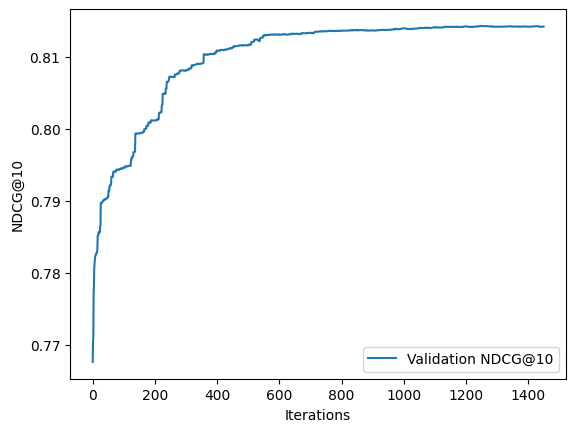

In [9]:
import matplotlib.pyplot as plt

history = model.get_evals_result()

val_metric_key = list(history['validation'].keys())[0]

val_scores = history['validation'][val_metric_key]

plt.plot(val_scores, label="Validation NDCG@10")
plt.xlabel("Iterations")
plt.ylabel("NDCG@10")
plt.legend()
plt.show()

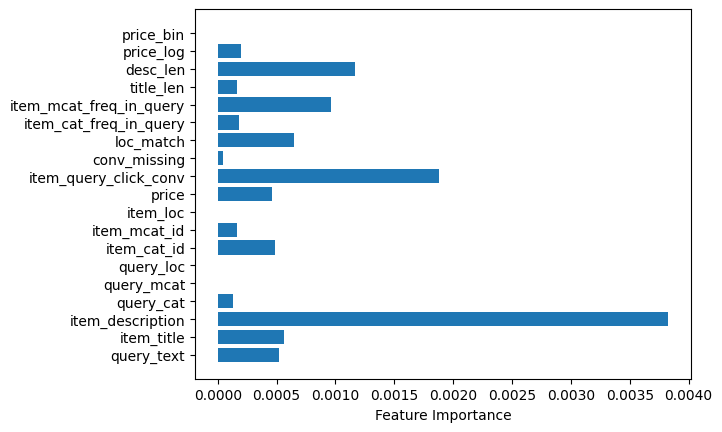

In [17]:
# feat_imp = model.get_feature_importance(train_pool, type='FeatureImportance')
import matplotlib.pyplot as plt

plt.barh(features, feat_imp)
plt.xlabel("Feature Importance")
plt.show()

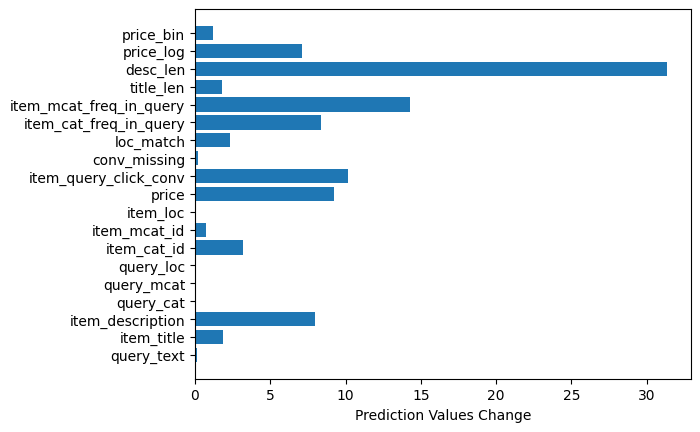

In [11]:
feat_imp = model.get_feature_importance(train_pool, type='PredictionValuesChange')
plt.barh(features, feat_imp)
plt.xlabel("Prediction Values Change")
plt.show()

In [12]:
 model.save_model(f"catboost_model.cbm")

In [8]:
test = pd.read_parquet('/kaggle/input/avito-reranker/test-dset-small.parquet')

In [30]:
test.head()

query_id     item_id  query_text  \
0        55  7540855789  1 —Å–µ–Ω—Ç—è–±—Ä—è   
1        55  7506720336  1 —Å–µ–Ω—Ç—è–±—Ä—è   
2        55  3110733862  1 —Å–µ–Ω—Ç—è–±—Ä—è   
3        55  7587733901  1 —Å–µ–Ω—Ç—è–±—Ä—è   
4        55  7552455685  1 —Å–µ–Ω—Ç—è–±—Ä—è   

                                       item_title  \
0         –í–æ–∑–¥—É—à–Ω—ã–µ –∏ –≥–µ–ª–∏–µ–≤—ã–µ —à–∞—Ä—ã –Ω–∞ 1 —Å–µ–Ω—Ç—è–±—Ä—è   
1                             1 —Å–µ–Ω—Ç—è–±—Ä—è —Ñ–æ—Ç–æ–∑–æ–Ω–∞   
2                   –ë—É–∫–µ—Ç –Ω–∞ 1 —Å–µ–Ω—Ç—è–±—Ä—è –∏–∑ –∑–µ—Ñ–∏—Ä–∞   
3               –°–ø–µ–∫—Ç–∞–∫–ª—å-–ø–∞–Ω—Ç–æ–º–∏–º–∞ –Ω–∞ 1 —Å–µ–Ω—Ç—è–±—Ä—è   
4  –í–æ–∑–¥—É—à–Ω—ã–µ –≥–µ–ª–∏–µ–≤—ã–µ —à–∞—Ä—ã —Å –¥–æ—Å—Ç–∞–≤–∫–æ–π 1 —Å–µ–Ω—Ç—è–±—Ä—è   

                                    item_description  query_cat  query_mcat  \
0  –í–û–ó–î–£–®–ù–´–ï –®–ê–†–´ –ö 1 –°–ï–ù–¢–Ø–ë–†–Ø üçÇ\n\nüéí –î—Ä—É–∑—å—è! –ú—ã ...      114.0        63.0   
1  üéà–§–æ—Ç–æ–∑–æ–Ω–∞ –∏–∑ —à–∞—Ä–æ–≤ –Ω–∞ 1 —Å–µ–Ω—Ç—è–±—Ä—è ‚Äì —Å–æ–∑–¥–∞–π—Ç–µ –ø—Ä...      114.0        63.0   
2  –ë—É–∫–µ—Ç—ã –Ω–∞ 1 —Å–µ–Ω—Ç—è–±—Ä—è \n\n–§–æ—Ç–æ 1. –ë—É–∫–µ—Ç –ü–∏–æ–Ω–æ–≤ ...      114.0        63.0   
3  –°–ø–µ–∫—Ç–∞–∫–ª—å-–ø–∞–Ω—Ç–æ–º–∏–º–∞ –Ω–∞ 1 —Å–µ–Ω—Ç—è–±—Ä—è!\n\nüëçüèº–ò–¥–µ–∞–ª—å...      114.0        63.0   
4  –í–æ–∑–¥—É—à–Ω—ã–µ —à–∞—Ä—ã –¥–ª—è –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è —à–∫–æ–ª –∏ –∫–ª–∞—Å—Å–æ–≤ –Ω...      114.0        63.0   

   query_loc  item_cat_id  item_mcat_id  item_loc   price  \
0   637640.0          114       2301564    637640   120.0   
1   637640.0          114       2301564    637640  5000.0   
2   637640.0          114       1090077    637640  1200.0   
3   637640.0          114       2301563    637640     0.0   
4   637640.0          114       2301564    637640   100.0   

   item_query_click_conv  
0                   -1.0  
1                   -1.0  
2                   -1.0  
3                   -1.0  
4                   -1.0

In [10]:
prepare_dataset(test, False)
build_features(test)

In [11]:
cat_features = ['query_cat', 'query_mcat', 'query_loc',
                'item_cat_id', 'item_mcat_id', 'item_loc']
ignore_features = ['item_contact','query_id','item_id']
text_features = ['query_text', 'item_title', 'item_description']
features = [c for c in df.columns if c not in ignore_features]
target_col = 'item_contact'

test_pool = Pool(
    data=test[features],
    group_id=test["query_id"],
    cat_features=[f for f in cat_features if f in features],
    text_features=[f for f in text_features if f in features]
)
preds = model.predict(test_pool)

In [12]:
test["pred"] = preds

submission = (
    test
    .sort_values(["query_id", "pred"], ascending=[True, False])
    .loc[:, ["query_id", "item_id"]]
)
submission.head()

query_id     item_id
11        55  7464296355
22        55  7562354327
15        55   823036541
14        55  7555956997
8         55  7552064016

In [13]:
submission.to_csv("submission.csv", index=False)

In [14]:
from catboost import Pool
test = pd.read_parquet('/kaggle/input/avito-reranker/test-dset-small.parquet')
prepare_dataset(test, False)
build_features(test)

cat_features = ['query_cat', 'query_mcat', 'query_loc',
                'item_cat_id', 'item_mcat_id', 'item_loc']
ignore_features = ['item_contact','query_id','item_id']
text_features = ['query_text', 'item_title', 'item_description']
features = [c for c in df.columns if c not in ignore_features]

test_pool = Pool(
    data=test[features],
    group_id=test["query_id"],
    cat_features=[f for f in cat_features if f in features],
    text_features=[f for f in text_features if f in features]
)

test["pred"] = model.predict(test_pool)

test["rank"] = (
    test.groupby("query_id")["pred"]
        .rank(method="first", ascending=False)
        .astype("int32")
)

submission = test.loc[:, ["query_id", "item_id"]]

submission.to_csv("submission.csv", index=False)


In [16]:
submission = test.loc[:, ["query_id", "item_id"]]

submission.to_csv("submission.csv", index=False)
